In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


In [4]:
# Universial Hyper-parameters
batchSize = 250

### Relu non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0877 s
Reach the maximum iteration	 423.52 s
At 356 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.513833992095
Development Accuracy:	 0.444596443228
Evaluation Accuracy:	 0.404840484048


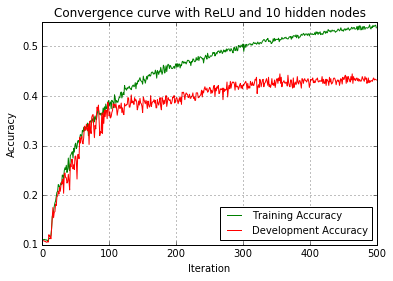

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04831 s
Reach the maximum iteration	 507.2 s
At 345 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.460079051383
Development Accuracy:	 0.381668946648
Evaluation Accuracy:	 0.375137513751


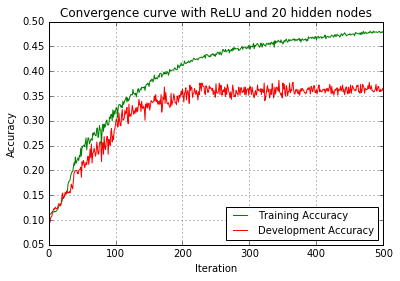

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04982 s
Reach the maximum iteration	 537.35 s
At 464 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.563043478261
Development Accuracy:	 0.367989056088
Evaluation Accuracy:	 0.371837183718


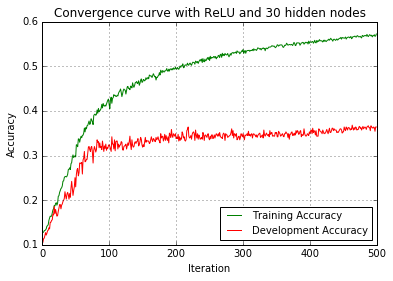

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.05546 s
Reach the maximum iteration	 489.04 s
At 459 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.367786561265
Development Accuracy:	 0.310533515732
Evaluation Accuracy:	 0.294829482948


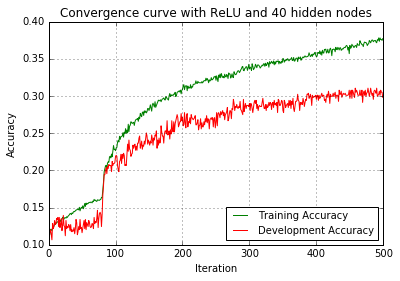

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04389 s
Reach the maximum iteration	 379.23 s
At 455 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.509288537549
Development Accuracy:	 0.358413132695
Evaluation Accuracy:	 0.368536853685


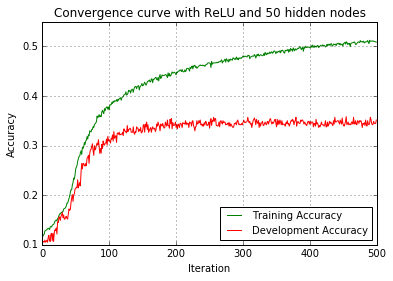

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.1, 0.1, 0.09, 0.08, 0.06]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='relu', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with ReLU and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Sigmoid non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.13807 s
Reach the maximum iteration	 889.14 s
At 463 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.574901185771
Development Accuracy:	 0.417236662107
Evaluation Accuracy:	 0.360836083608


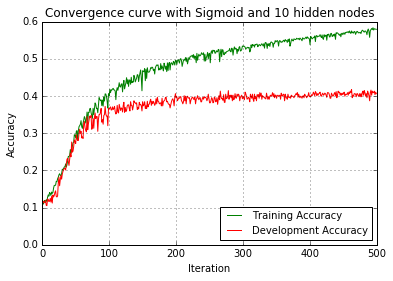

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.09121 s
Reach the maximum iteration	 929.19 s
At 316 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.603557312253
Development Accuracy:	 0.437756497948
Evaluation Accuracy:	 0.394939493949


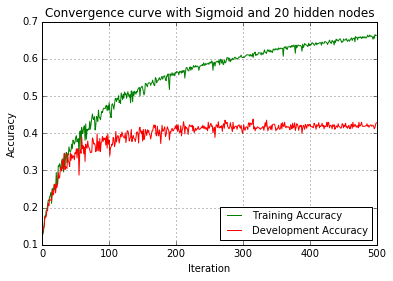

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.06214 s
Reach the maximum iteration	 956.23 s
At 343 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.693083003953
Development Accuracy:	 0.474692202462
Evaluation Accuracy:	 0.413641364136


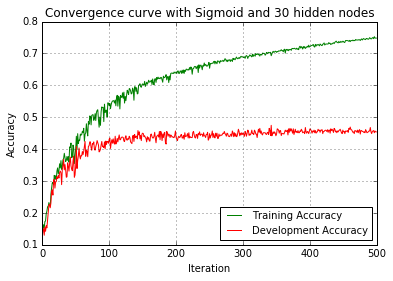

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.10794 s
Reach the maximum iteration	 1013.4 s
At 267 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.726679841897
Development Accuracy:	 0.491108071135
Evaluation Accuracy:	 0.403740374037


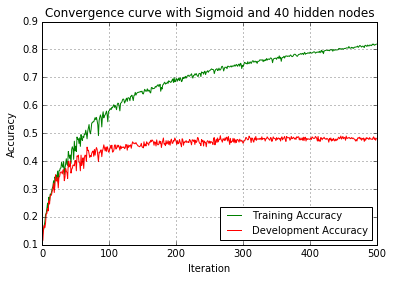

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.12257 s
Reach the maximum iteration	 1023.18 s
At 216 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.732411067194
Development Accuracy:	 0.470588235294
Evaluation Accuracy:	 0.443344334433


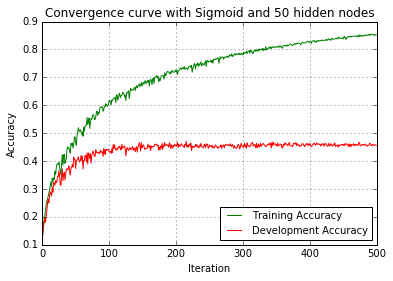

In [6]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='sigmoid', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Tanh non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.11184 s
Reach the maximum iteration	 319.01 s
At 243 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.570948616601
Development Accuracy:	 0.444596443228
Evaluation Accuracy:	 0.409240924092


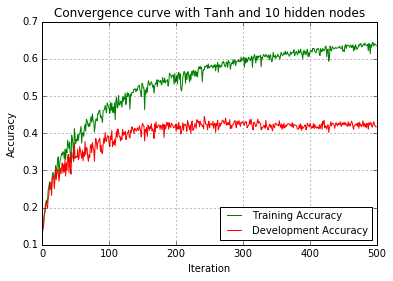

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04446 s
Reach the maximum iteration	 304.53 s
At 164 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.628063241107
Development Accuracy:	 0.425444596443
Evaluation Accuracy:	 0.372937293729


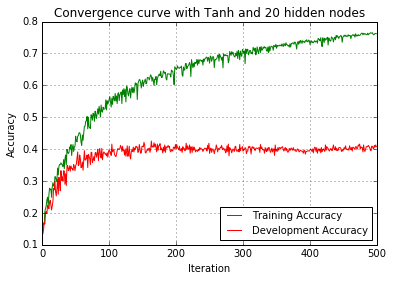

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04052 s
Reach the maximum iteration	 323.9 s
At 167 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.678853754941
Development Accuracy:	 0.444596443228
Evaluation Accuracy:	 0.390539053905


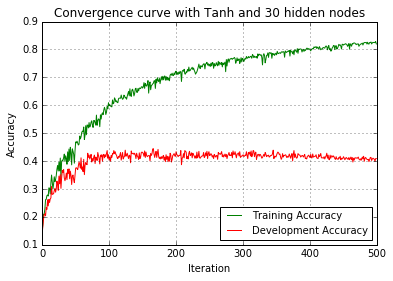

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04194 s
Reach the maximum iteration	 354.53 s
At 99 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.621541501976
Development Accuracy:	 0.419972640219
Evaluation Accuracy:	 0.382838283828


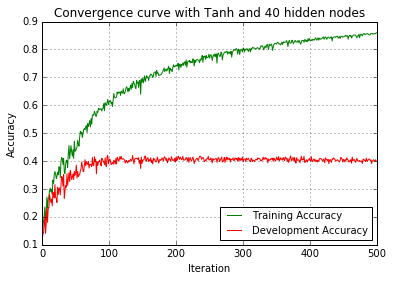

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04099 s
Reach the maximum iteration	 381.8 s
At 162 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.78023715415
Development Accuracy:	 0.447332421341
Evaluation Accuracy:	 0.410341034103


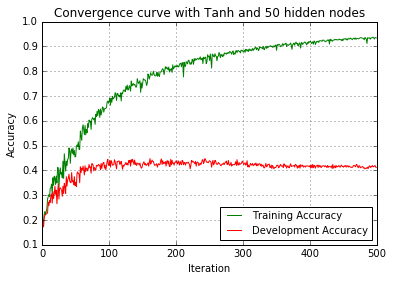

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)

    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='tanh', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Tanh and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### TensorFlow

In [ ]:
#########################################################
# Part 2: TensorFlow Analysis
print('*' * 60)
print('Part 5: TensorFlow Analysis')